In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

titanic = pd.read_csv('titanic.csv', sep=',',header=0)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


a. Clean the data by dropping the column which has the largest number of missing values.

In [53]:
sum1 = titanic.count().idxmin()
titanic.drop(sum1, axis = 1, inplace = True)

In [54]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


b. Find total number of passengers with age more than 30.

In [55]:
t1 = titanic[titanic["Age"] > 30]["PassengerId"].count()
print(t1)

305


c. Find total fare paid by passengers of second class.

In [56]:
second_class_passengers = titanic[titanic["Pclass"] == 2]
total_fare_second_class = second_class_passengers["Fare"].sum()
total_fare_second_class

3801.8417

d. Compare number of survivors of each passenger class.

In [58]:
second_class_passengers = titanic[titanic["Pclass"] == 1]
print(second_class_passengers["Survived"].count())
second_class_passengers = titanic[titanic["Pclass"] == 2]
print(second_class_passengers["Survived"].count())
second_class_passengers = titanic[titanic["Pclass"] == 3]
print(second_class_passengers["Survived"].count())

216
184
491


e. Compute descriptive statistics for age attribute gender wise.

In [59]:
gender_age_describe = titanic.groupby(["Sex"])["Age"].describe()
print(gender_age_describe)

        count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0


f. Draw a scatter plot for passenger fare paid by Female and Male passengers separately.

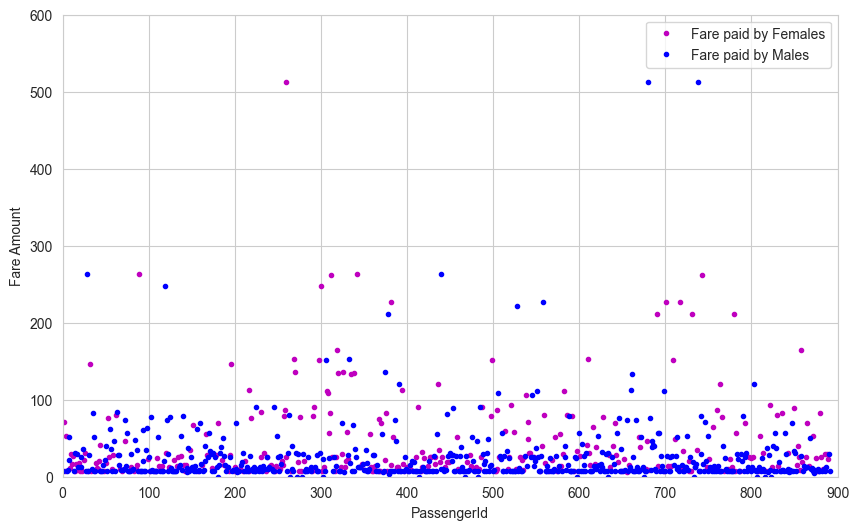

In [61]:
grouped_data = titanic.groupby(["Sex"])

female_id_x = grouped_data["PassengerId"].get_group("female")
female_fare_y = grouped_data["Fare"].get_group("female")

male_id_x = grouped_data["PassengerId"].get_group("male")
male_fare_y = grouped_data["Fare"].get_group("male")

plt.figure(figsize=(10,6))
plt.plot(female_id_x, female_fare_y, '.m')
plt.plot(male_id_x, male_fare_y, '.b')

plt.legend(["Fare paid by Females", "Fare paid by Males"])

plt.xlabel("PassengerId")
plt.ylabel("Fare Amount")

plt.xlim(0, 900)
plt.ylim(0, 600)

plt.show()

g. Compare density distribution for features age and passenger fare.

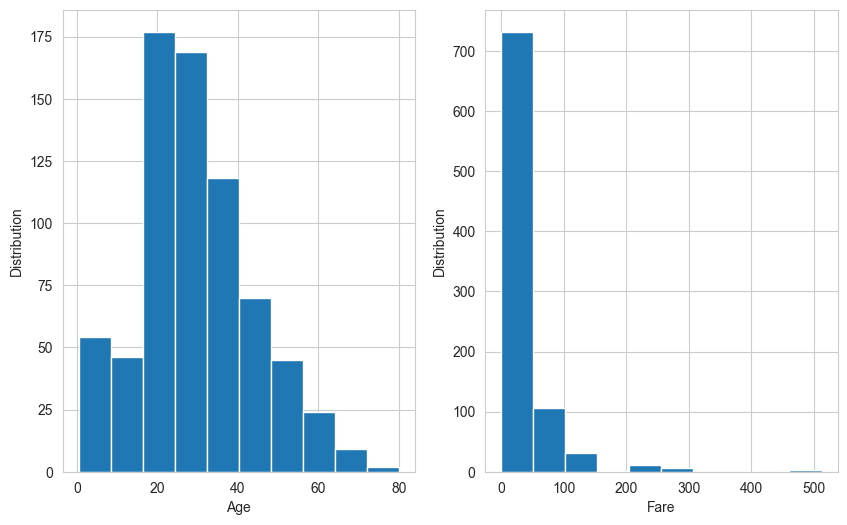

In [62]:
feature_age = titanic["Age"]
feature_fare = titanic["Fare"]

plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
plt.hist(feature_age)
plt.xlabel("Age")
plt.ylabel("Distribution")

plt.subplot(1, 2, 2)
plt.hist(feature_fare)
plt.xlabel("Fare")
plt.ylabel("Distribution")

plt.show()

h. Draw the pie chart for three groups labelled as class 1, class 2, class 3 respectively displayed in different colours. The occurrence of each group converted into percentage should be displayed in the pie chart. Appropriately Label the chart.

([<matplotlib.patches.Wedge at 0x1f85ccd0ac0>,
 [Text(0.796107424686281, 0.7590869306998885, 'class 1'),
  Text(-0.6221676201813416, 0.9071424653260843, 'class 2'),
  Text(-0.175716065426671, -1.0858747001155198, 'class 3')])

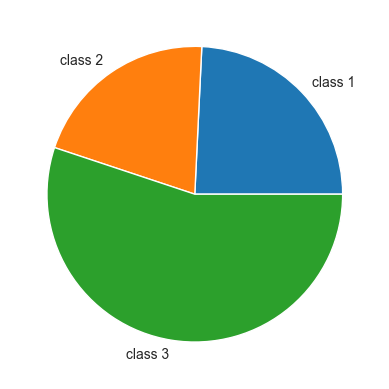

In [66]:
x = titanic.groupby(["Pclass"])["PassengerId"].count()

plt.pie(x, labels=["class 1", "class 2", "class 3"])

i. Find % of survived passengers for each class and answer the question “Did class play a role in survival?”.

In [68]:
pd.options.display.float_format = '{:,.1f}%'.format

grouped_data = titanic.groupby(["Pclass"])
survival_each_class = (grouped_data["Survived"].count()/grouped_data["PassengerId"].count()) * 100

print("Class played no role in the survival of the passengers as all the passengers in each class survived")
print(survival_each_class)

Class played no role in the survival of the passengers as all the passengers in each class survived
Pclass
1   100.0%
2   100.0%
3   100.0%
dtype: float64
